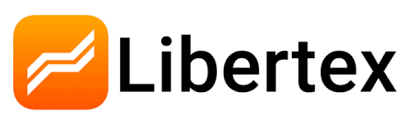

#  Understanding the Business problem (mobile app statistics)

In [1]:
write short description



SyntaxError: invalid syntax (Temp/ipykernel_3952/1481664807.py, line 1)

# Import the python libraries


Here we will be importing all neccessary libraries making it our library coven.

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly as py
import plotly.express as px
import plotly.offline as py


import dataset

In [2]:
ClientProfile = pd.read_csv('synthetic_data.csv')
ClientCountry =pd.read_csv('countries(1).csv')

# Data Cleaning

As my usual practice, I prefer writing short modules as tool for exploration analysis. It makes work faster and effective. It also prevents code repetation.

In this area we will be writing functions for data description, information on data, highlights (head), to display columns, shapes of data and as well as to display missing values.

From the output of the summary statistics, Outliers can be observed in the depo column. Obviously, negative payment can not be deposited so this indicates that we need to check for outliers.

The info output indicates a different row number total in channel column. This indicates the presence of missing values in channel column. The info out put also label the data type to show us what data-type we are dealing with.



In [3]:
def data_description(data):
    return (data.describe())

def data_info(data):
    return (data.info())

def data_head(data):
    return (data.head())

def data_column(data):
    return (data.columns)

def data_size(data):
    return (data.shape)

def missing_data(data):
    total = data.isnull().sum()
    percent = (total/data.isnull().count()*100)
    missing_columns = pd.concat([total, percent], axis = 1, keys = ["Total", "Percent"])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    missing_columns["Types"] = types
    return(np.transpose(missing_columns))

In [4]:
ClientProfile.head()

,Unnamed: 0,depo,segment,channel,clicks,latency,client_id
0,0,0.0,postid_4057,smm,1.0,2.649725,1442498.0
1,1,0.0,telegram,affiliate,10.0,2.610846,7865631.0
2,2,0.0,postid_8542,facebook,13.0,3.001162,8165584.0
3,3,0.0,telegram,direct,0.0,1.788369,5893056.0
4,4,0.0,telegram,smm,0.0,1.932069,3780924.0


In [48]:
ClientCountry.head()

,country,client_id
0,IN,6348826
1,FR,6751691
2,DE,8638448
3,LT,4722696
4,ES,2411132


merging the two datasets

In [3]:
df1 = pd.merge(ClientCountry, ClientProfile, on = "client_id")
df1


,country,client_id,Unnamed: 0,depo,segment,channel,clicks,latency
0,IN,6348826,135788,0.0,postid_2272,social media,22.0,3.571894
1,FR,6751691,30285,0.0,postid_275,smm,0.0,0.942220
2,FR,6751691,30285,0.0,postid_275,smm,0.0,0.942220
3,DE,8638448,99020,0.0,telegram,facebook,19.0,2.801449
4,LT,4722696,23716,307.0,telegram,social media,26.0,1.458857
...,...,...,...,...,...,...,...,...
219309,DE,2626295,64380,385.0,postid_9076,facebook,0.0,4.490812
219310,US,7817131,69527,0.0,telegram,smm,0.0,2.966362
219311,MO,1023767,112098,0.0,postid_7202,social media,3.0,3.704628
219312,MO,7518683,119055,0.0,postid_4200,smm,4.0,3.258969


check for data size, columns, data info, data description

In [6]:
data_size(df1)

(219314, 8)

In [8]:
data_column(df1)

Index(['country', 'client_id', 'Unnamed: 0', 'depo', 'segment', 'channel',
       'clicks', 'latency'],
      dtype='object')

In [9]:
data_info(df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219314 entries, 0 to 219313
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   country     219314 non-null  object 
 1   client_id   219314 non-null  int64  
 2   Unnamed: 0  219314 non-null  int64  
 3   depo        219314 non-null  float64
 4   segment     219314 non-null  object 
 5   channel     217065 non-null  object 
 6   clicks      219314 non-null  float64
 7   latency     219314 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ MB


In [21]:
data_description(df2)

,client_id,s/n,depo,clicks,latency
count,2.193140e+05,219314.000000,219314.000000,219314.000000,219314.000000
mean,4.992632e+06,65291.068518,21.349207,11.428190,3.022827
std,2.310152e+06,45165.661814,368.334720,12.627812,1.047155
min,1.000126e+06,0.000000,-164.000000,0.000000,0.000071
25%,2.989190e+06,27414.000000,0.000000,0.000000,2.323893
50%,4.987345e+06,54828.000000,0.000000,8.000000,3.004932
75%,6.994740e+06,102730.750000,0.000000,19.000000,3.691859
max,8.999961e+06,157559.000000,29527.000000,50.000000,11.016521


Drop column unnamed and remove missing values (Since missing values makes 1% of the data)

In [20]:
df2= df1.rename(columns={'Unnamed: 0' : 's/n'})
df2

,country,client_id,s/n,depo,segment,channel,clicks,latency
0,IN,6348826,135788,0.0,postid_2272,social media,22.0,3.571894
1,FR,6751691,30285,0.0,postid_275,smm,0.0,0.942220
2,FR,6751691,30285,0.0,postid_275,smm,0.0,0.942220
3,DE,8638448,99020,0.0,telegram,facebook,19.0,2.801449
4,LT,4722696,23716,307.0,telegram,social media,26.0,1.458857
...,...,...,...,...,...,...,...,...
219309,DE,2626295,64380,385.0,postid_9076,facebook,0.0,4.490812
219310,US,7817131,69527,0.0,telegram,smm,0.0,2.966362
219311,MO,1023767,112098,0.0,postid_7202,social media,3.0,3.704628
219312,MO,7518683,119055,0.0,postid_4200,smm,4.0,3.258969


There are about 2249 data input missing in channel column amounting to about 1% of the total data. Dropping this rows will not have a huge effect on our data. So we drop empty rows.



In [23]:
df2["s/n"]

0         135788
1          30285
2          30285
3          99020
4          23716
           ...  
219309     64380
219310     69527
219311    112098
219312    119055
219313     67671
Name: s/n, Length: 219314, dtype: int64

In [5]:

df1 = df1.drop(["Unnamed: 0"],axis=1)


In [6]:
df1.head()

,country,client_id,depo,segment,channel,clicks,latency
0,IN,6348826,0.0,postid_2272,social media,22.0,3.571894
1,FR,6751691,0.0,postid_275,smm,0.0,0.942220
2,FR,6751691,0.0,postid_275,smm,0.0,0.942220
3,DE,8638448,0.0,telegram,facebook,19.0,2.801449
4,LT,4722696,307.0,telegram,social media,26.0,1.458857


In [22]:
missing_data(df2)

,country,client_id,s/n,depo,segment,channel,clicks,latency
Total,0,0,0,0,0,2249,0,0
Percent,0.0,0.0,0.0,0.0,0.0,1.02547,0.0,0.0
Types,object,int64,int64,float64,object,object,float64,float64


In [27]:
df3 = df2.dropna()
data_info(df3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217065 entries, 0 to 219313
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    217065 non-null  object 
 1   client_id  217065 non-null  int64  
 2   depo       217065 non-null  float64
 3   segment    217065 non-null  object 
 4   channel    217065 non-null  object 
 5   clicks     217065 non-null  float64
 6   latency    217065 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ MB


Outliers

drop outlier in depo column

In [29]:
df3['depo'].value_counts()

 0.0        207122
 304.0          42
 241.0          38
 296.0          36
 340.0          36
             ...  
 13929.0         1
-41.0            1
 20478.0         1
 828.0           1
 679.0           1
Name: depo, Length: 807, dtype: int64

<AxesSubplot:xlabel='depo'>

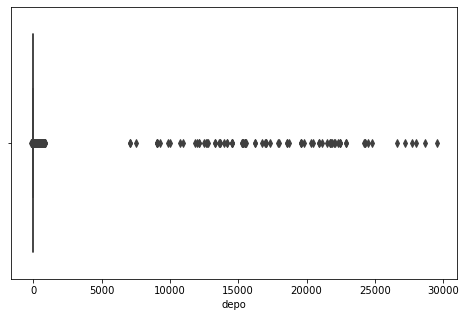

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot('depo',data=df3)



Numbers and location of outliers

Negative payment is an outlier because deposit can not be credit but knowing the outliers for high range deposits is a bit difficult to determine. A mobile app can not be as expensive as 5000 dollars but information on this is not clear so i will assume a range of 0 (no deposit) to 3000 dollars. Any depo that falls out of this range is considered as outlier and will be removed. About 0.79% of our data is outlier following this range in deposit column making minimum deposit to be 0 and maximum to be 867 dollars with a mean around 14 dollars. The total number of outliers from depo is 2430 leads.

The latency for the network has a mean around 3.2iseconds with a maximum of 11 miniseconds. This can also influence leads turning to clients.


In [ ]:
#we need to be careful at placing the higher bound as an individual can start with any amount of deposit, 
#since it is a trading app, not like they are paying for the mobile app.

In [32]:
valid_depo = df3[df3['depo'].between(-1, 5000, inclusive=False)]

valid_depo_count = valid_depo['depo'].count()
data_count = df3['depo'].count()
print('Percentage removed: ' + str(100 - round(valid_depo_count/data_count * 100, 2)) + '%')

Percentage removed: 0.0799999999999983%


segment

In [35]:
import re
replace = re.compile("([a-zA-Z]+)")

df3['segment_id'] = df3['segment'].str.extract(replace)
df3['integer'] = df3['segment'].str.replace(replace, "")

Since ID number of post in segement column does not matter we need to remove the id by performing some data engineering.

I decided to split the object_value in the segment column to interger and segment id. I will later drop the segment column and the interger column. Now we have a segment id that contains only classification objects.

In [36]:
df4 = df3.drop(['integer', 'segment'], axis=1)
df4

,country,client_id,depo,channel,clicks,latency,segment_id
0,IN,6348826,0.0,social media,22.0,3.571894,postid
1,FR,6751691,0.0,smm,0.0,0.942220,postid
2,FR,6751691,0.0,smm,0.0,0.942220,postid
3,DE,8638448,0.0,facebook,19.0,2.801449,telegram
4,LT,4722696,307.0,social media,26.0,1.458857,telegram
...,...,...,...,...,...,...,...
219309,DE,2626295,385.0,facebook,0.0,4.490812,postid
219310,US,7817131,0.0,smm,0.0,2.966362,telegram
219311,MO,1023767,0.0,social media,3.0,3.704628,postid
219312,MO,7518683,0.0,smm,4.0,3.258969,postid


In [22]:
merge
check for missing values
check for outliers
create some functions


SyntaxError: invalid syntax (Temp/ipykernel_3952/1789503800.py, line 2)

# Exploratory Data Analysis

The countries of the leads are basically in 3 continents, Europe with 7 countries followed by Asia with 3 countries. USA is the only country from North America. This shows that the app is not known at all in Africa, South America and so on. 11 countries in 3 continents.*USA, Germany, Spain, Iceland, Italy, France, India, Vietname, Luxembourg, Macao and Lithuania.*

It seems the traffic from country are almost evenly. The traffic is not location biased. This could mean that the app is not language and weather biased too. Maybe it is age sensitive or sex biased. we will check this too. yet Germany have the highest traffic percent followed by Vietnam in Asia. Luxembourg has the lowest traffic percent.


In [37]:
df4['country'].value_counts()

DE    19992
ES    19924
US    19897
IS    19797
LT    19740
FR    19719
VN    19697
MO    19656
IT    19638
IN    19636
LU    19369
Name: country, dtype: int64

In [38]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df3))
    g = sns.countplot(df['country'], order = df['country'].value_counts().index[:100], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 


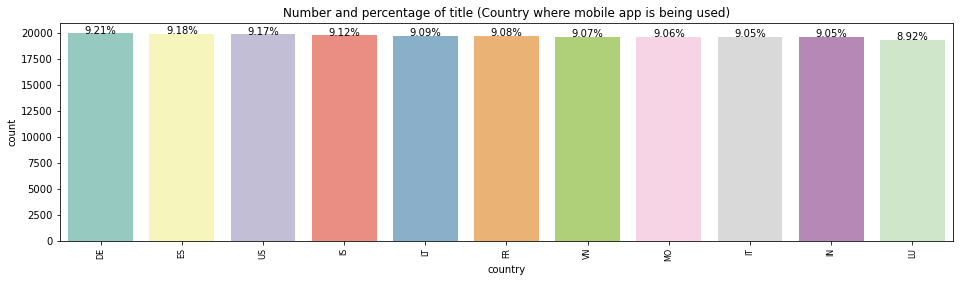

In [40]:
plot_count('title', 'title (Country where mobile app is being used)', df4, size=4)



In [ ]:
#country with more depo ()  #visualise
sns.lineplot(x = 'country', y = 'depo', data = df4)
 
# Show the plot
plt.show()

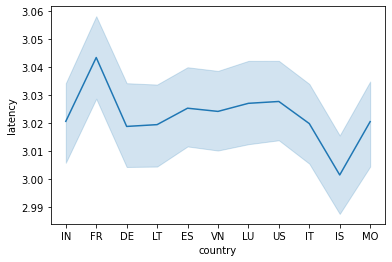

In [46]:
#country with fast latency #visualise
sns.lineplot(x = 'country', y = 'latency', data = df4)
 
# Show the plot
plt.show()

In [ ]:
sns.lineplot(df4['latency'])

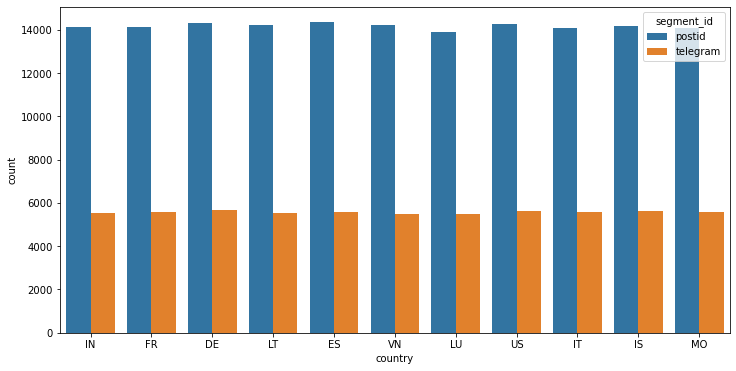

In [41]:
#country with segment  #visualise
plt.figure(figsize=(12,6))
sns.countplot(data=df4, x="country", hue="segment_id")
plt.show()

across the countries post leads then telegram

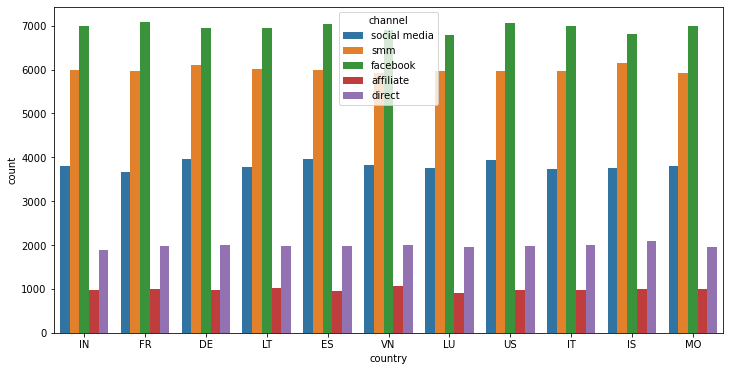

In [42]:
#country with channel  #visualise
plt.figure(figsize=(12,6))
sns.countplot(data=df4, x="country", hue="channel")
plt.show()

facebook has the highest engagement across all the listed countries

# Channels

 The channel column have 5 unique channels facebook, smm, social media, direct and affiliation. There are 5 main web traffic in which these list can fall into.

    Paid web traffic: leads come from online adds on facebook, Google Ads etc. They found the app on ad ons.
    Direct web traffic: leads come directly to the web by typing the web URL in the browser. They might have heard about the app from someone and they decide to visit directly (direct).
    Referral web traffic: leads come through different links from other source. Affiliation falls in this category. Lead got to know through referrer.
    Social web traffic: similar to Paid web traffic but here involves highly involved active subscribers of a platform such as youtube, instagram etc. A third party contractor will be needed. Social media channel falls into this category.
    Organic traffic: leads come from search engines. The awarenesss maybe accidental. I Think smm falls in this class.




In [ ]:
df3['channel'].value_counts()

In [ ]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df3))
    g = sns.countplot(df['channel'], order = df['channel'].value_counts().index[:100], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

From the visualization the following can be concluded:

    probably their marketing focused majorly on facebook ads and facebook platform users with approximately 36% leads.
    the name of the mobile app could be a sort of generic common name that can easily be featured in any random search. we  will explore on this later.
    the users of the app might actually love the app or comment about the app on their social media platforms thereby    increasing the app awareness in this channel. Since the main source of leads are from articles on internet. We will explore on this as well
    less people refer leads to this app and there are less affiliates too. 



In [ ]:
channels_count = df3['channel'].value_counts().reset_index().rename(columns = {'index' : 'Labels'})
channels_count

In [ ]:
plot_count('title', 'title (Channels to traffic)', df3, size=2)



In [ ]:
channel vs latency#visualize
x=channel  
y = latency  hue= country or channel

In [ ]:
channel vs latency#visualize
x=channel  
y = latency

In [ ]:
channel vs segment  #visualise

# Click

In [ ]:
click with depo (client/lead) #visualize

In [ ]:
clicks vs latency

In [ ]:
explain result

# segment



The segment_id column contains only two unique values postid and telegaram. There are 155757 leads from article while 61308 leads are from telegram. It means the traffic to this app mainly comes from leads through Articles.

This indicates that more awareness of the app is made on articles compare to telegram. That makes sense because people read more on the internet than on telegram these days.


In [ ]:
df3['segment_id'].value_counts()

In [ ]:
DF_1 = DF.copy() 
DF_1['client_status'] = DF_1['segment']                 ##creating new column for 'client_status' (as a copy of segment column)
DF_1.loc[DF_1['depo'] > 0, 'client_status'] = 'Client'  ## "CLIENTS" are those who have registered and made a deposit "depo>0" 
DF_1.loc[DF_1['depo'] == 0, 'client_status'] = 'Lead'   ## "LEAD" are those who have registered and WITHOUT a deposit "depo==0" 
DF_1.loc[DF_1['segment'].str.contains('postid'), 'segment'] = 'post'  ##Replacing all entries with "postID" with "post" 

DF_1[['client_id','client_status','segment','channel','depo', 'clicks', 'latency', 'country',]]                                

In [ ]:
clientStatus_data = DF_1.groupby(['segment','client_status']).count()[['client_id']].reset_index()
clientStatus_data = clientStatus_data.rename(columns={'client_id':'num_client_status'})
clientStatus_data

In [ ]:
clientStatus_data = DF_1.groupby(['segment','client_status']).count()[['client_id']].reset_index()
clientStatus_data = clientStatus_data.rename(columns={'client_id':'num_client_status'})
clientStatus_data

In [ ]:
segment vs country #visualise

In [ ]:
segment vs channel #visualise

In [ ]:
count segment in channel #visualise

# Data Engineering

Both from histogram visualization, its been noticed that facebook have the highest channel to traffic by 76517 leads followed by smm and direct. Affiliation is having the lowest percentage of channel to traffic.



